In [1]:
import pandas as pd

In [ ]:
# Início Modificação Helio

In [2]:
import os 
filepath = os.path.join(os.getcwd(), 'Dados', 'dataset_grad_pres.csv')

In [3]:
ev = pd.read_csv(filepath, engine='python', 
                     on_bad_lines='warn', encoding='iso-8859-1', header=0, sep = ";")

In [4]:
# Fim Modificação Helio

In [5]:
ev.keys()

Index(['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO', 'LNG', 'LAT', 'LOCAL', 'LNG_ORGM',
       'LAT_ORGM', 'LOCAL_ORGM'],
      dtype='object')

In [6]:
ev.shape

(64540, 19)

In [7]:
display(ev.isnull().sum().sort_values(ascending=False).to_frame(name='Contagem Nulos').sort_index())

,Contagem Nulos
ANO_INGRESSO,0
AREA,0
CAMPUS,0
COTA,2713
CURSO_NOME,0
ETNIA,2208
LAT,2047
LAT_ORGM,22561
LNG,2047
LNG_ORGM,22561


In [9]:
display(ev.nunique(dropna=True).to_frame(name='Contagem Unicos').sort_index())

,Contagem Unicos
ANO_INGRESSO,16
AREA,7
CAMPUS,2
COTA,14
CURSO_NOME,76
ETNIA,6
LAT,1453
LAT_ORGM,1341
LNG,1336
LNG_ORGM,1224


In [10]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64540 entries, 0 to 64539
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO_INGRESSO       64540 non-null  int64 
 1   SEMESTRE_INGRESSO  64540 non-null  int64 
 2   TIPO_INGRESSO      64540 non-null  object
 3   COTA               61827 non-null  object
 4   CURSO_NOME         64540 non-null  object
 5   AREA               64540 non-null  object
 6   SITUACAO           64540 non-null  object
 7   MOTIVO_SAIDA       64540 non-null  object
 8   CAMPUS             64540 non-null  object
 9   TURNO              64540 non-null  object
 10  ETNIA              62332 non-null  object
 11  SEXO               64540 non-null  object
 12  TIPOCURSO          64540 non-null  object
 13  LNG                62493 non-null  object
 14  LAT                62493 non-null  object
 15  LOCAL              64540 non-null  object
 16  LNG_ORGM           41979 non-null  objec

In [11]:
ev['MOTIVO_SAIDA'].unique()

array(['A Especificar', 'Abandono', 'Conclusão', 'Abandono/2ª Mod/Hab',
       'Mudança de Curso', 'Desistência', 'Cancelamento',
       'Aluno sem matrícula', 'Transferência', 'CALOURO SEM RENDIMENTO',
       'Desligamento', 'Desistencia2ªMod/Hab', 'Jubilamento',
       'Transferencia Port. 230/07 MEC', 'Falecimento',
       'Perda de Vínculo', 'Jubilamento 2a modalidade', 'Liminar Cassada',
       'Outro'], dtype=object)

In [12]:
ev['MOTIVO_SAIDA'].value_counts()

MOTIVO_SAIDA
A Especificar                     22415
Conclusão                         22120
Abandono                           8468
Desistência                        7617
Cancelamento                       1091
Mudança de Curso                    830
CALOURO SEM RENDIMENTO              624
Jubilamento                         451
Desligamento                        444
Transferência                       149
Aluno sem matrícula                 120
Abandono/2ª Mod/Hab                  92
Jubilamento 2a modalidade            51
Falecimento                          19
Desistencia2ªMod/Hab                 16
Perda de Vínculo                     10
Outro                                10
Liminar Cassada                       9
Transferencia Port. 230/07 MEC        4
Name: count, dtype: int64

In [13]:
colunas = ['ANO_INGRESSO', 'SEMESTRE_INGRESSO', 'TIPO_INGRESSO', 'COTA',
       'CURSO_NOME', 'AREA', 'SITUACAO', 'MOTIVO_SAIDA', 'CAMPUS', 'TURNO',
       'ETNIA', 'SEXO', 'TIPOCURSO']

t1 = ev[colunas].copy()

In [14]:
import matplotlib.pyplot as plt

In [15]:
t1 = ev.loc[ev['SITUACAO'] == 'Evadido']

In [16]:
t2 = t1['CURSO_NOME'].value_counts()

In [18]:
t2.head(15)

CURSO_NOME
CIÊNCIAS EXATAS                                     2173
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS    1883
CIÊNCIAS ECONÔMICAS                                  922
BACHARELADO INTERDISCIPLINAR EM ARTES E DESIGN       839
ADMINISTRAÇÃO                                        826
DIREITO                                              711
EDUCAÇÃO FÍSICA                                      677
NUTRIÇÃO                                             612
CIÊNCIAS CONTÁBEIS                                   604
FARMÁCIA                                             603
LETRAS                                               559
QUÍMICA                                              530
ENFERMAGEM                                           483
GEOGRAFIA                                            462
HISTÓRIA                                             450
Name: count, dtype: int64

In [19]:
import seaborn as sns

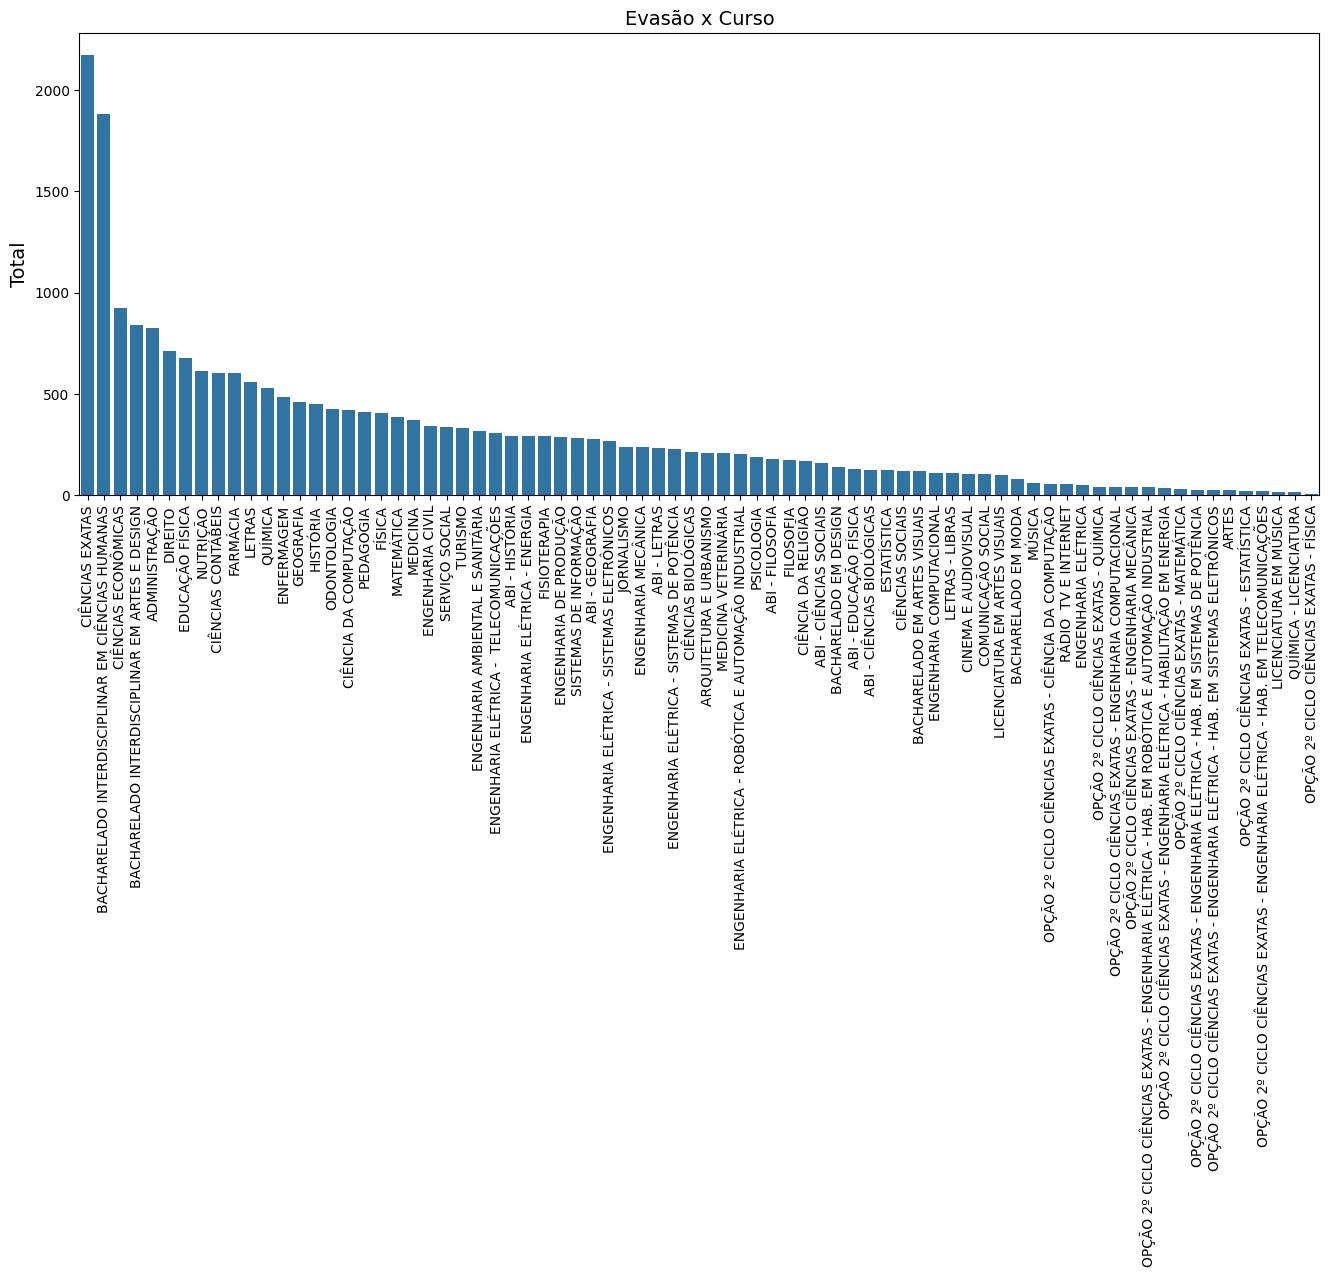

In [20]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=t2.index, 
                y=t2)

axes.set_title('Evasão x Curso', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [24]:
t3 = t1.loc[(t1['CURSO_NOME'] == 'CIÊNCIAS EXATAS')]

In [25]:
t4 = t3['MOTIVO_SAIDA'].value_counts()

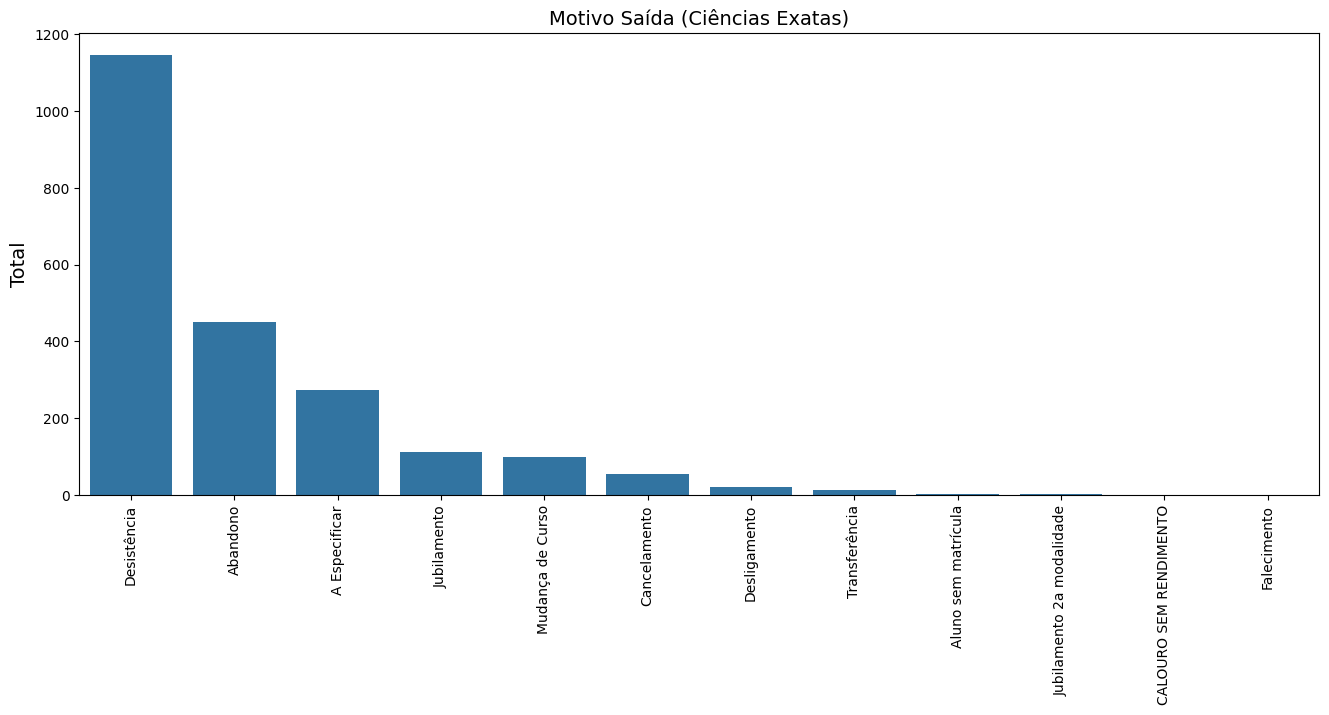

In [26]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=t4.index, 
                y=t4)

axes.set_title('Motivo Saída (Ciências Exatas)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [27]:
t5 = t3['COTA'].value_counts()

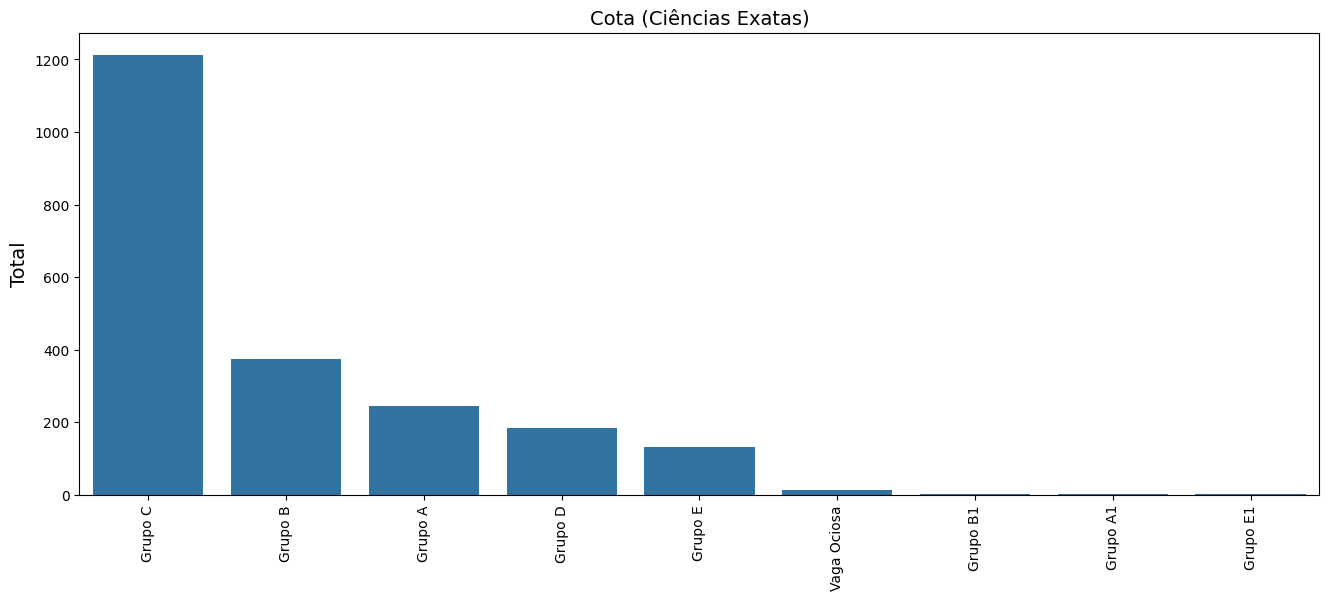

In [28]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=t5.index, 
                y=t5)

axes.set_title('Cota (Ciências Exatas)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

## Conhecendo os grupos:

* **Grupo A:** candidatos com renda igual ou inferior a um salário mínimo e meio per capita familiar mensal, que tenham cursado o Ensino Médio integralmente em escola pública e que se declarem pretos, pardos ou indígenas;
* **Grupo A1:** candidatos com deficiência com renda igual ou inferior a um salário mínimo e meio per capita familiar mensal, que tenham cursado o Ensino Médio integralmente em escola pública e que se declarem pretos, pardos ou indígenas;
* **Grupo B:** candidatos com renda igual ou inferior a um salário mínimo e meio per capita familiar mensal, que tenham cursado o Ensino Médio integralmente em escola pública, independentemente de outra declaração;
* **Grupo B1:** candidatos com deficiência com renda igual ou inferior a um salário mínimo e meio per capita familiar mensal, que tenham cursado o Ensino Médio integralmente em escola pública, independentemente de outra declaração;
* **Grupo C:** vagas de ampla concorrência, independentemente de renda ou de escola;
* **Grupo D:** candidatos que tenham cursado o Ensino Médio integralmente em escola pública e que se declarem pretos, pardos ou indígenas, independentemente de renda;
* **Grupo D1:** candidatos com deficiência que tenham cursado o Ensino Médio integralmente em escola pública e que se declarem pretos, pardos ou indígenas, independentemente de renda;
* **Grupo E:** candidatos que tenham cursado o Ensino Médio integralmente em escola pública, independentemente de renda ou autodeclaração;
* **Grupo E1:** candidatos com deficiência que tenham cursado o Ensino Médio integralmente em escola pública, independentemente de renda ou autodeclaração.

In [29]:
ev['SITUACAO'].unique()

array(['Evadido', 'Concluido', 'Ativo'], dtype=object)

In [30]:
ev['TIPO_INGRESSO'].unique()

array(['Transferência Obrigatória', 'VESTIBULAR', 'PISM',
       'CV/Nova Modalidade/Habilitação', 'CV/Vaga de Edital',
       'Nova Modalidade/Habilitação', 'INGRESSO VAGA OCIOSA', 'SiSU',
       'SiSU VAGA OCIOSA', 'PISM VAGA OCIOSA', 'CV/Mudança de Curso',
       'VESTIBULAR EAD PROFESSORES',
       'Programa de Estudante Convênio-Graduação',
       'VESTIBULAR VAGA OCIOSA', 'Decisão Judicial', 'Sentença Judicial',
       'Graduado/Nova Modalidade/Habilitação',
       'Transferência/Nova Modalidade/Habilitação',
       'Complementação/Nova Modalidade/Habilitação', 'Projetos Especiais',
       'Outros', 'Resolução 005/2004 - CONGRAD', 'PEC-G / TRANSFERENCIA',
       'OPCAO SEGUNDO CICLO DO B. I. EM CIENCIAS HUMANAS',
       'PEC.G/Mudança de Curso', 'PISM/Vaga de Edital/Mudança de Curso',
       'OPÇÃO SEGUNDO CICLO DO CIÊNCIAS EXATAS',
       'OPCAO SEGUNDO CICLO DO B. I. EM ARTES E DESIGN',
       'Plano de Açoes Articuladas - PAR', 'Graduado/Mudança de Curso'],
      dtype=object)

In [31]:
ev['TIPO_INGRESSO'].value_counts()

TIPO_INGRESSO
SiSU                                                30374
PISM                                                18505
VESTIBULAR                                          10765
INGRESSO VAGA OCIOSA                                 1815
SiSU VAGA OCIOSA                                      753
CV/Nova Modalidade/Habilitação                        558
OPCAO SEGUNDO CICLO DO B. I. EM ARTES E DESIGN        316
OPCAO SEGUNDO CICLO DO B. I. EM CIENCIAS HUMANAS      301
Nova Modalidade/Habilitação                           237
CV/Mudança de Curso                                   199
Transferência Obrigatória                             144
OPÇÃO SEGUNDO CICLO DO CIÊNCIAS EXATAS                143
PISM VAGA OCIOSA                                      137
CV/Vaga de Edital                                      97
Programa de Estudante Convênio-Graduação               74
VESTIBULAR EAD PROFESSORES                             58
VESTIBULAR VAGA OCIOSA                                 16


In [32]:
a1 = ev.loc[(ev['TIPO_INGRESSO'] == 'VESTIBULAR')]

In [33]:
a1['ANO_INGRESSO'].value_counts()

ANO_INGRESSO
2011    2495
2012    2264
2010    1970
2009    1690
2008    1334
2013     541
2015     145
2014     142
2016      69
2020      27
2017      21
2018      21
2019      18
2021      16
2022       8
2023       4
Name: count, dtype: int64

In [34]:
d1 = ev.loc[(ev['ANO_INGRESSO'] <= 2012)]

In [35]:
d1.shape

(15651, 19)

In [36]:
d1['ANO_INGRESSO'].value_counts()

ANO_INGRESSO
2012    3935
2011    3759
2010    3075
2009    2655
2008    2227
Name: count, dtype: int64

In [37]:
d1 = d1.loc[(ev['TIPO_INGRESSO'] == 'SiSU') 
            | (ev['TIPO_INGRESSO'] == 'PISM')
            | (ev['TIPO_INGRESSO'] == 'SiSU VAGA OCIOSA')
            | (ev['TIPO_INGRESSO'] == 'PISM VAGA OCIOSA')
            | (ev['TIPO_INGRESSO'] == 'VESTIBULAR')
            | (ev['TIPO_INGRESSO'] == 'VESTIBULAR VAGA OCIOSA')]

In [38]:
d1.shape

(14455, 19)

In [39]:
d1['TIPO_INGRESSO'].value_counts()

TIPO_INGRESSO
VESTIBULAR          9753
PISM                4042
SiSU                 658
PISM VAGA OCIOSA       2
Name: count, dtype: int64

In [40]:
d1_2 = d1.loc[(d1['TIPO_INGRESSO'] == 'PISM')]
d1_2 = d1_2['ANO_INGRESSO'].value_counts()

In [41]:
d1_3 = d1.loc[(d1['TIPO_INGRESSO'] == 'VESTIBULAR')]
d1_3 = d1_3['ANO_INGRESSO'].value_counts()

In [42]:
d1_2

ANO_INGRESSO
2011    953
2010    888
2012    854
2009    702
2008    645
Name: count, dtype: int64

In [43]:
d1_3

ANO_INGRESSO
2011    2495
2012    2264
2010    1970
2009    1690
2008    1334
Name: count, dtype: int64

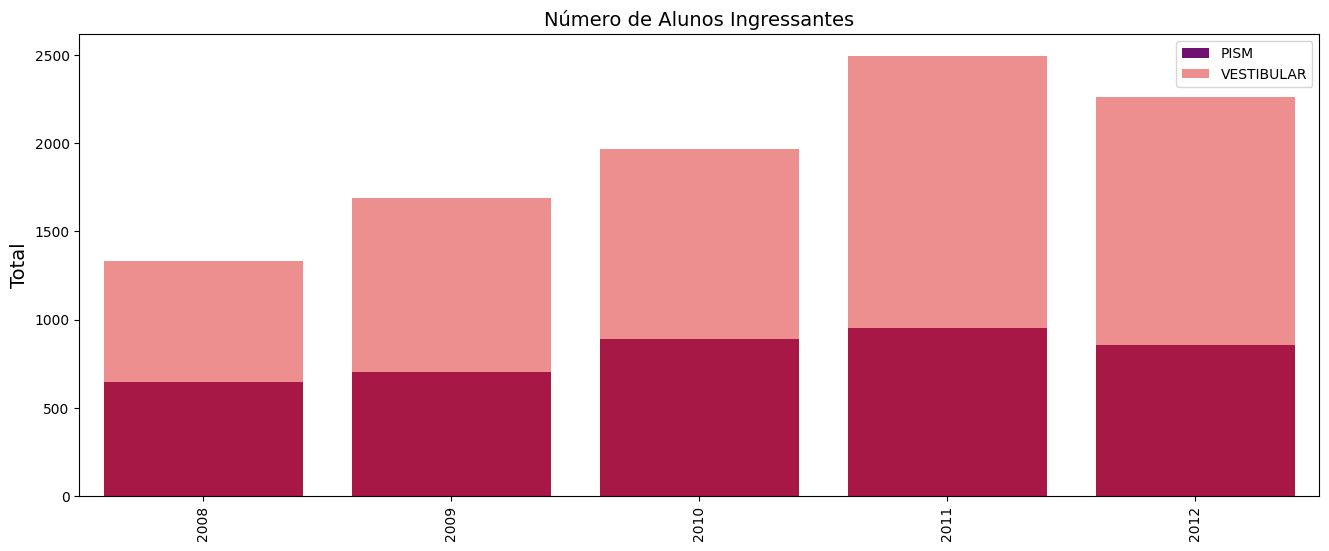

In [45]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

sns.barplot(x=d1_2.index, 
                y=d1_2,
           color = 'purple',
           label='PISM')

sns.barplot(x=d1_3.index, 
                y=d1_3,
           color = 'red',
            alpha=0.5,
           label='VESTIBULAR')

axes.set_title('Número de Alunos Ingressantes', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [46]:
d2 = ev.loc[(ev['ANO_INGRESSO'] > 2012)]

In [47]:
d2 = d2.loc[(ev['TIPO_INGRESSO'] == 'SiSU') 
            | (ev['TIPO_INGRESSO'] == 'PISM')
            | (ev['TIPO_INGRESSO'] == 'SiSU VAGA OCIOSA')
            | (ev['TIPO_INGRESSO'] == 'PISM VAGA OCIOSA')]

In [48]:
d2.shape

(45067, 19)

In [49]:
d2['TIPO_INGRESSO'].value_counts()

TIPO_INGRESSO
SiSU                29716
PISM                14463
SiSU VAGA OCIOSA      753
PISM VAGA OCIOSA      135
Name: count, dtype: int64

In [50]:
d2_1 = d2['ANO_INGRESSO'].value_counts()

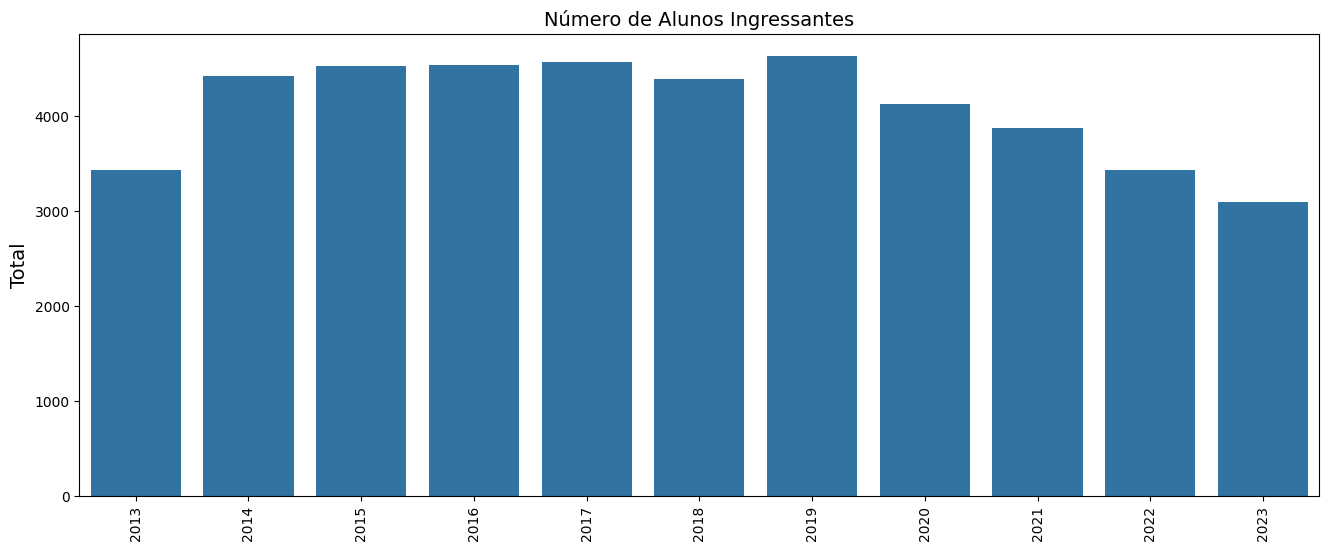

In [51]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=d2_1.index, 
                y=d2_1)

axes.set_title('Número de Alunos Ingressantes', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [52]:
d2['CURSO_NOME'].unique()

array(['ABI - CIÊNCIAS BIOLÓGICAS', 'CIÊNCIAS BIOLÓGICAS',
       'ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'CIÊNCIAS ECONÔMICAS',
       'DIREITO', 'FARMÁCIA', 'FISIOTERAPIA', 'MEDICINA',
       'ABI - FILOSOFIA', 'FILOSOFIA', 'NUTRIÇÃO', 'FÍSICA',
       'ODONTOLOGIA', 'GEOGRAFIA', 'ABI - GEOGRAFIA', 'EDUCAÇÃO FÍSICA',
       'ABI - HISTÓRIA', 'HISTÓRIA', 'ABI - LETRAS', 'LETRAS',
       'PEDAGOGIA', 'SERVIÇO SOCIAL', 'ABI - EDUCAÇÃO FÍSICA',
       'ENFERMAGEM', 'ENGENHARIA CIVIL', 'PSICOLOGIA',
       'ARQUITETURA E URBANISMO', 'CIÊNCIA DA COMPUTAÇÃO',
       'ENGENHARIA DE PRODUÇÃO', 'MÚSICA', 'CIÊNCIAS EXATAS',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA COMPUTACIONAL',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - CIÊNCIA DA COMPUTAÇÃO',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ESTATÍSTICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - FÍSICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - MATEMÁTICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - QUÍMICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXA

In [53]:
d3 = d2[d2['CURSO_NOME'].str.contains("ABI -", regex=False)]

In [54]:
d5 = d2[~d2['CURSO_NOME'].str.contains("ABI -", regex=False)]

In [55]:
d5['CURSO_NOME'].unique()

array(['CIÊNCIAS BIOLÓGICAS', 'ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS',
       'CIÊNCIAS ECONÔMICAS', 'DIREITO', 'FARMÁCIA', 'FISIOTERAPIA',
       'MEDICINA', 'FILOSOFIA', 'NUTRIÇÃO', 'FÍSICA', 'ODONTOLOGIA',
       'GEOGRAFIA', 'EDUCAÇÃO FÍSICA', 'HISTÓRIA', 'LETRAS', 'PEDAGOGIA',
       'SERVIÇO SOCIAL', 'ENFERMAGEM', 'ENGENHARIA CIVIL', 'PSICOLOGIA',
       'ARQUITETURA E URBANISMO', 'CIÊNCIA DA COMPUTAÇÃO',
       'ENGENHARIA DE PRODUÇÃO', 'MÚSICA', 'CIÊNCIAS EXATAS',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA COMPUTACIONAL',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - CIÊNCIA DA COMPUTAÇÃO',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ESTATÍSTICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - FÍSICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - MATEMÁTICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - QUÍMICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA ELÉTRICA - HABILITAÇÃO EM ENERGIA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA ELÉTRICA - HAB. EM ROBÓTICA E AUTOMAÇÃO IN

In [56]:
d5.shape

(43165, 19)

In [57]:
d3['CURSO_NOME'].unique()

array(['ABI - CIÊNCIAS BIOLÓGICAS', 'ABI - FILOSOFIA', 'ABI - GEOGRAFIA',
       'ABI - HISTÓRIA', 'ABI - LETRAS', 'ABI - EDUCAÇÃO FÍSICA',
       'ABI - CIÊNCIAS SOCIAIS'], dtype=object)

In [58]:
d3['SITUACAO'].value_counts()

SITUACAO
Evadido    1132
Ativo       770
Name: count, dtype: int64

In [59]:
d3.shape

(1902, 19)

In [60]:
d3_1 = d3.loc[d3['SITUACAO'] == 'Evadido']

In [61]:
d3_1.shape

(1132, 19)

In [62]:
d3_2 = d3_1['MOTIVO_SAIDA'].value_counts()

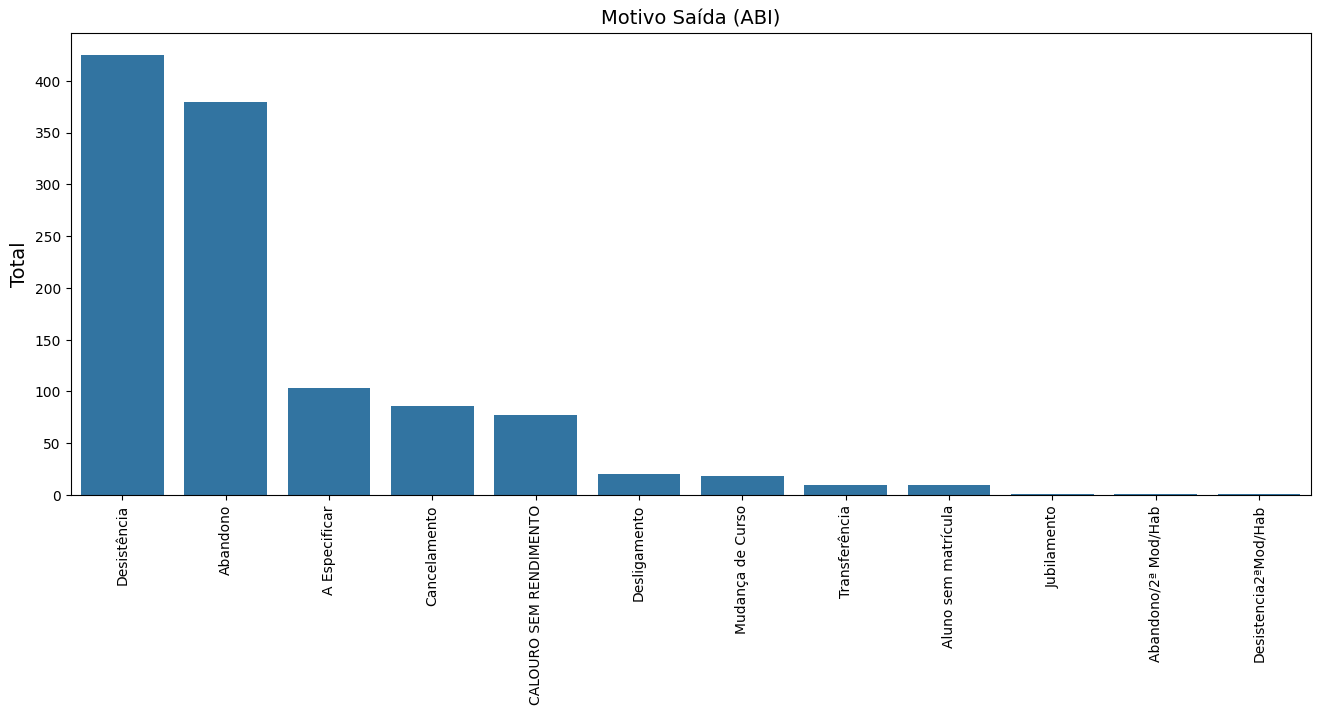

In [63]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=d3_2.index, 
                y=d3_2)

axes.set_title('Motivo Saída (ABI)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [64]:
d3_3 = d3_1['COTA'].value_counts()

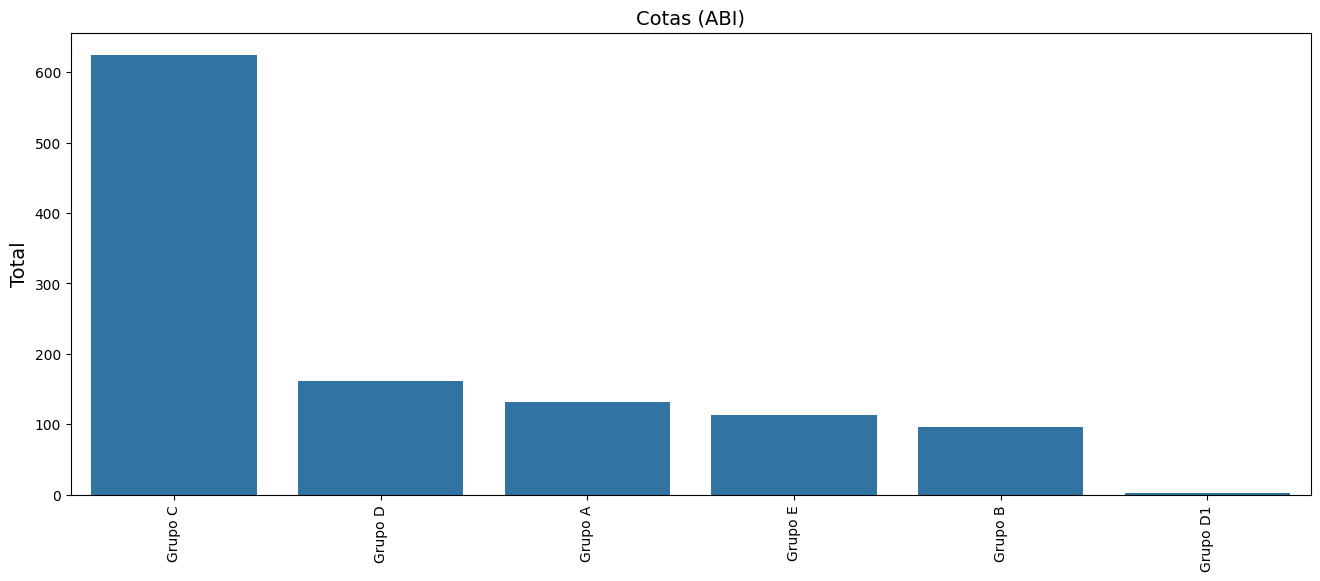

In [65]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=d3_3.index, 
                y=d3_3)

axes.set_title('Cotas (ABI)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [58]:
d4 = d2[d2['CURSO_NOME'].str.contains("OPÇÃO 2º CICLO CIÊNCIAS EXATAS", regex=False)]

In [59]:
d5 = d5[~d5['CURSO_NOME'].str.contains("OPÇÃO 2º CICLO CIÊNCIAS EXATAS", regex=False)]

In [60]:
d5['CURSO_NOME'].unique()

array(['CIÊNCIAS BIOLÓGICAS', 'ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS',
       'CIÊNCIAS ECONÔMICAS', 'DIREITO', 'FARMÁCIA', 'FISIOTERAPIA',
       'MEDICINA', 'FILOSOFIA', 'NUTRIÇÃO', 'FÍSICA', 'ODONTOLOGIA',
       'GEOGRAFIA', 'EDUCAÇÃO FÍSICA', 'HISTÓRIA', 'LETRAS', 'PEDAGOGIA',
       'SERVIÇO SOCIAL', 'ENFERMAGEM', 'ENGENHARIA CIVIL', 'PSICOLOGIA',
       'ARQUITETURA E URBANISMO', 'CIÊNCIA DA COMPUTAÇÃO',
       'ENGENHARIA DE PRODUÇÃO', 'MÚSICA', 'CIÊNCIAS EXATAS',
       'ENGENHARIA COMPUTACIONAL', 'ESTATÍSTICA', 'MATEMÁTICA', 'QUÍMICA',
       'ENGENHARIA ELÉTRICA - ENERGIA',
       'ENGENHARIA ELÉTRICA - ROBÓTICA E AUTOMAÇÃO INDUSTRIAL',
       'ENGENHARIA ELÉTRICA - SISTEMAS DE POTÊNCIA',
       'ENGENHARIA ELÉTRICA - SISTEMAS ELETRÔNICOS',
       'ENGENHARIA ELÉTRICA -  TELECOMUNICAÇÕES', 'ENGENHARIA MECÂNICA',
       'BACHARELADO INTERDISCIPLINAR EM ARTES E DESIGN',
       'CINEMA E AUDIOVISUAL', 'BACHARELADO EM ARTES VISUAIS',
       'BACHARELADO EM DESIGN', 'BACHARELADO EM

In [61]:
d4['CURSO_NOME'].unique()

array(['OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA COMPUTACIONAL',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - CIÊNCIA DA COMPUTAÇÃO',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ESTATÍSTICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - FÍSICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - MATEMÁTICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - QUÍMICA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA ELÉTRICA - HABILITAÇÃO EM ENERGIA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA ELÉTRICA - HAB. EM ROBÓTICA E AUTOMAÇÃO INDUSTRIAL',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA ELÉTRICA - HAB. EM SISTEMAS DE POTÊNCIA',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA ELÉTRICA - HAB. EM SISTEMAS ELETRÔNICOS',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA ELÉTRICA - HAB. EM TELECOMUNICAÇÕES',
       'OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA MECÂNICA'],
      dtype=object)

In [62]:
d4.shape

(501, 19)

In [63]:
d4_1 = d4.loc[d4['SITUACAO'] == 'Evadido']

In [64]:
d4_2 = d4_1['MOTIVO_SAIDA'].value_counts()

/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


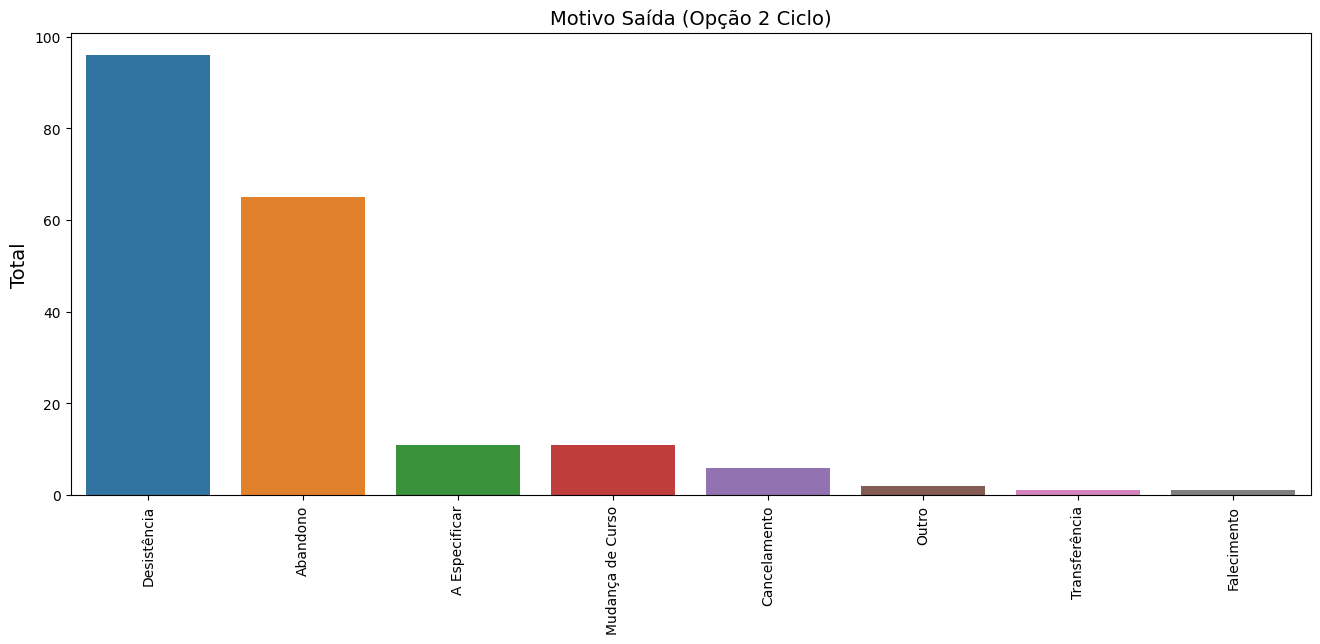

In [65]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=d4_2.index, 
                y=d4_2)

axes.set_title('Motivo Saída (Opção 2 Ciclo)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [66]:
d4_3 = d4_1['COTA'].value_counts()

/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


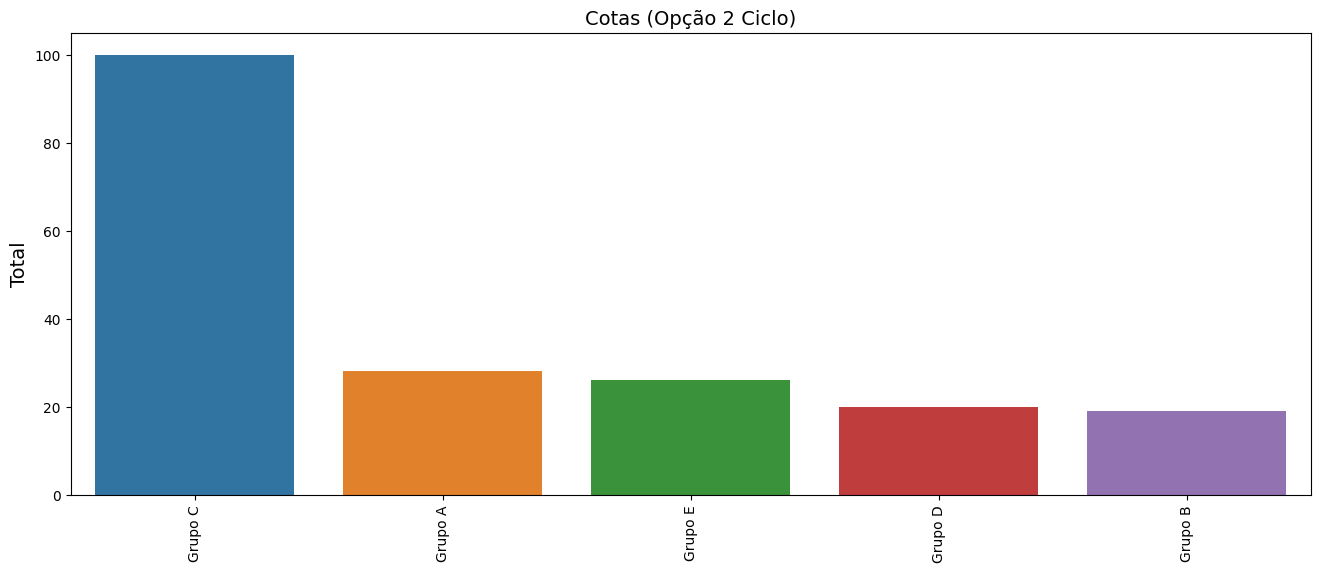

In [67]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=d4_3.index, 
                y=d4_3)

axes.set_title('Cotas (Opção 2 Ciclo)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [68]:
d5_1 = d5.loc[d5['SITUACAO'] == 'Evadido']

In [69]:
d5_2 = d5_1['CURSO_NOME'].value_counts()

In [70]:
d5 = d5[~d5['CURSO_NOME'].str.contains("BACHARELADO INTERDISCIPLINAR", regex=False)]

In [71]:
d5 = d5[~d5['CURSO_NOME'].str.contains("CIÊNCIAS EXATAS", regex=False)]

/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


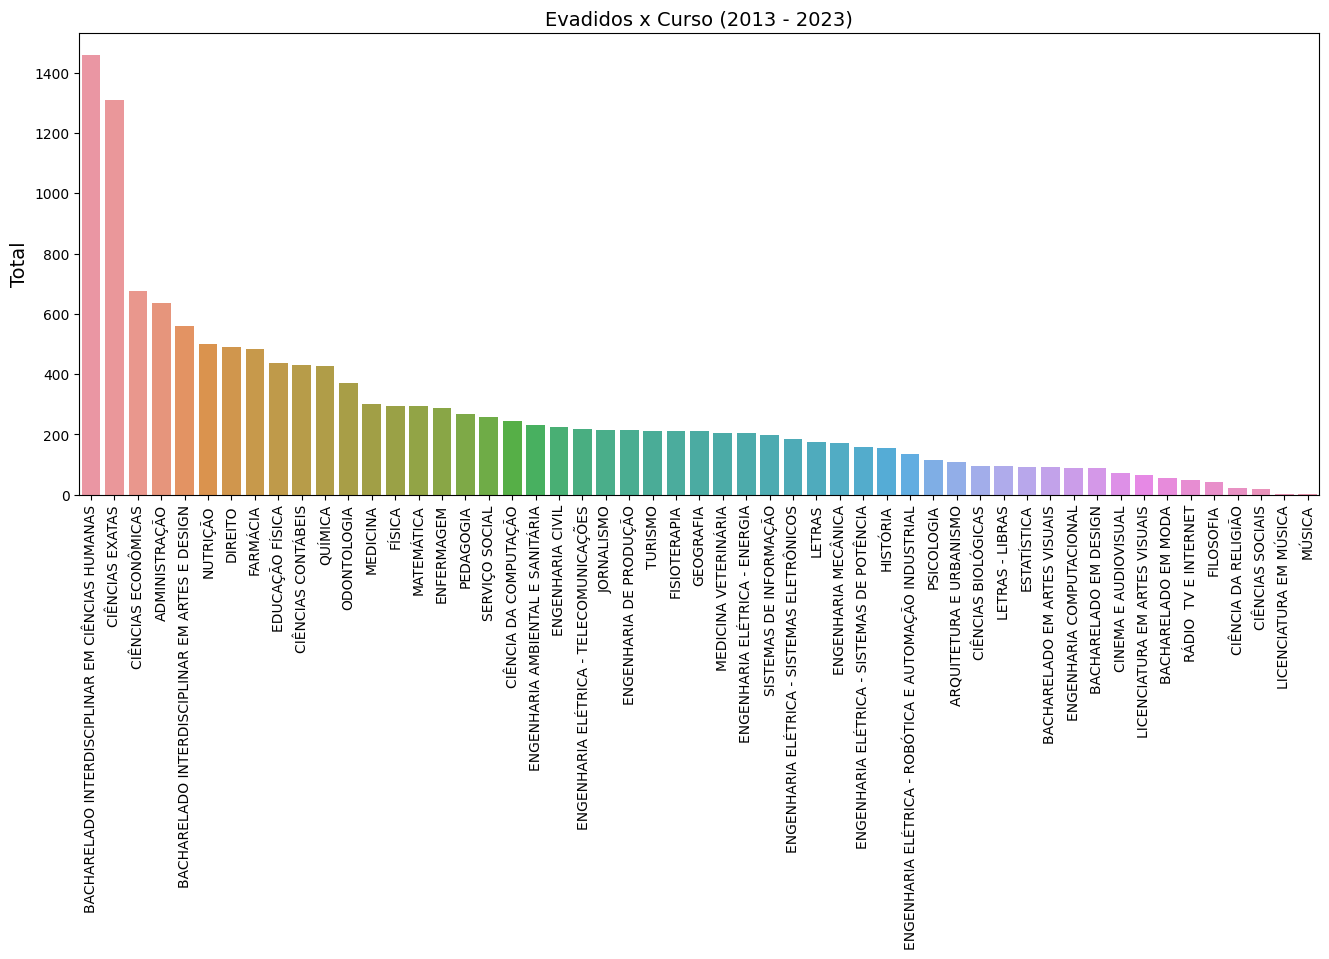

In [72]:
f, axes = plt.subplots(1, 1,  figsize=(16, 6))

g = sns.barplot(x=d5_2.index, 
                y=d5_2)

axes.set_title('Evadidos x Curso (2013 - 2023)', fontsize=14)
axes.set_ylabel('Total', fontsize=14)
axes.set(xlabel='') 

plt.xticks(rotation=90)

plt.show()

In [73]:
d5['CURSO_NOME'].value_counts()

CURSO_NOME
DIREITO                                                  2933
MEDICINA                                                 2752
CIÊNCIAS ECONÔMICAS                                      1650
NUTRIÇÃO                                                 1621
ODONTOLOGIA                                              1607
FARMÁCIA                                                 1583
ADMINISTRAÇÃO                                            1388
CIÊNCIAS CONTÁBEIS                                       1087
ENGENHARIA CIVIL                                         1070
EDUCAÇÃO FÍSICA                                          1059
MEDICINA VETERINÁRIA                                      928
JORNALISMO                                                874
LETRAS                                                    852
ENFERMAGEM                                                848
FISIOTERAPIA                                              823
PEDAGOGIA                                                 7

In [74]:
d5.shape

(36232, 19)

In [75]:
d5['SITUACAO'].unique()

array(['Evadido', 'Concluido', 'Ativo'], dtype=object)

In [76]:
d5_3 = d5_1.loc[d5_1['CURSO_NOME'] == 'CIÊNCIAS ECONÔMICAS']

In [96]:
d5_3['COTA'].value_counts()

COTA
Grupo C     362
Grupo D      99
Grupo A      89
Grupo E      70
Grupo B      53
Grupo B1      2
Grupo D1      1
Name: count, dtype: int64

In [97]:
d5_3['SEXO'].value_counts()

SEXO
M    456
F    220
Name: count, dtype: int64

In [98]:
d5_4 = d5.loc[d5['CURSO_NOME'] == 'CIÊNCIAS ECONÔMICAS']

In [99]:
d5_4['COTA'].value_counts()

COTA
Grupo C     922
Grupo D     210
Grupo A     200
Grupo E     166
Grupo B     146
Grupo B1      3
Grupo D1      2
Grupo A1      1
Name: count, dtype: int64

In [109]:
d5_5 = d5.loc[d5['CURSO_NOME'] == 'LETRAS']

In [110]:
d5_5['COTA'].value_counts()

COTA
Grupo C     433
Grupo A     112
Grupo B     103
Grupo E     102
Grupo D      84
Grupo A1      2
Grupo D1      1
Name: count, dtype: int64

In [111]:
d5_6 = d5.loc[d5['CURSO_NOME'] == 'ENGENHARIA ELÉTRICA - ROBÓTICA E AUTOMAÇÃO INDUSTRIAL']

In [113]:
nome_cursos = d5['CURSO_NOME'].unique()

In [114]:
d6 = d5.groupby('CURSO_NOME')['COTA'].value_counts()

In [115]:
d6_1 = d5.loc[d5['SITUACAO'] == 'Evadido']

In [116]:
d6_2 = d6_1.groupby('CURSO_NOME')['COTA'].value_counts()

In [ ]:
## Início Modificações Hélio

In [245]:
def evadido_vs_ingressante_por_filtro(d5, filtro):
    d6 = d5.groupby('CURSO_NOME')[filtro].value_counts()
    d6_1 = d5.loc[d5['SITUACAO'] == 'Evadido']
    d6_2 = d6_1.groupby('CURSO_NOME')[filtro].value_counts()
    evadido_vs_ingressante = pd.merge(d6_2, d6, how='right', on=['CURSO_NOME', filtro]).fillna(0)
    evadido_vs_ingressante['pct_evasao'] = evadido_vs_ingressante['count_x']/evadido_vs_ingressante['count_y']
    evadido_vs_ingressante['evadidos'] = evadido_vs_ingressante['count_x']
    evadido_vs_ingressante['nao_evadidos'] = evadido_vs_ingressante['count_y'] - evadido_vs_ingressante['evadidos']
    return evadido_vs_ingressante

In [246]:
def cota_por_curso(evadido_vs_ingressante, curso):
    df_exemplo = evadido_vs_ingressante[['evadidos', 'nao_evadidos', 'pct_evasao', 'count_y']].loc[curso]

    ax = df_exemplo[['evadidos', 'nao_evadidos']].plot(kind='bar', stacked=True)
    for i, (eixo_x, eixo_y1, eixo_y2) in enumerate(zip(ax.get_xticklabels(), df_exemplo['evadidos'], df_exemplo['evadidos'] + df_exemplo['nao_evadidos'])):
        ax.annotate(f"{df_exemplo['pct_evasao'].loc[eixo_x.get_text()]:.2%}", xy=(i, eixo_y1), rotation=45)
        ax.annotate(df_exemplo['count_y'].loc[eixo_x.get_text()], xy=(i, eixo_y2), rotation=45)

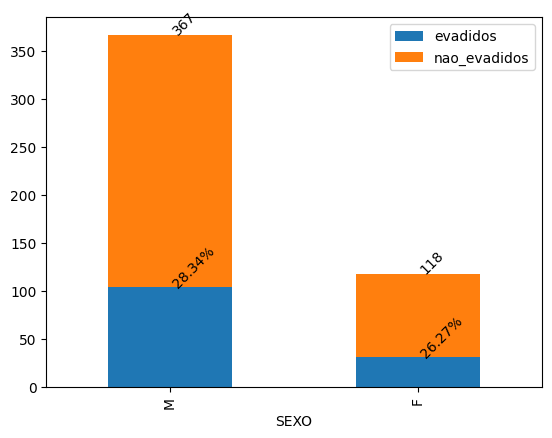

In [247]:
cota_por_curso(evadido_vs_ingressante_por_filtro(d5, 'SEXO'), 'ENGENHARIA ELÉTRICA - ROBÓTICA E AUTOMAÇÃO INDUSTRIAL')

In [ ]:
## Fim Modificações Hélio

In [91]:
d7 = d5.groupby('CURSO_NOME')['SEXO'].value_counts()

In [92]:
d7_1 = d5.loc[d5['SITUACAO'] == 'Evadido']

In [93]:
d7_2 = d7_1.groupby('CURSO_NOME')['SEXO'].value_counts()

In [94]:
def sexo_por_curso(curso):
    f, axes = plt.subplots(1, 1, figsize=(8, 3))
    sns.barplot(data=d7.loc[curso].sort_index())
    #sns.barplot(data=d7_2.loc[curso].sort_index())
    ax = sns.barplot(data=d7_2.loc[curso].sort_index())
    percentage = [100, 100, 10, 30]
    patches = ax.patches
    for i in range(len(patches)):
       x = patches[i].get_x() + patches[i].get_width()/2
       y = patches[i].get_height()+.05
       ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
    axes.set_title(curso, fontsize=12)
    axes.set_ylabel('Total', fontsize=10)
    axes.set(xlabel='')
    plt.show()

/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):
/Users/heliomacedofilho/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


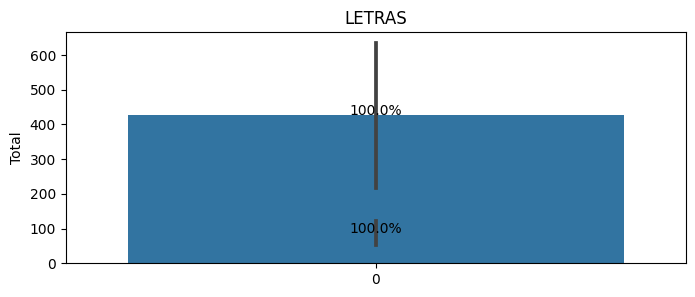

In [95]:
sexo_por_curso('LETRAS')